# Exploratory Machine Learning

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
# from scipy import stats
import pickle

import matplotlib.pyplot as plt

# from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.utils import shuffle
# from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import RFE, RFECV

In [2]:
# import seaborn as sns
# sns.set()

In [3]:
params = { 'axes.grid': True
          ,'axes.axisbelow': True
          ,'grid.color': '0.5'
          ,'legend.numpoints': 1
          ,'savefig.bbox': 'tight'
          ,'font.size': 16
          ,'legend.loc': 'best'
          ,'legend.fontsize': 'medium'
          #,'lines.markersize': 6
          ,'xtick.labelsize': 'small'
          ,'ytick.labelsize': 'small'
          #,'xtick.direction': 'out'
          #,'ytick.direction': 'out'
          ,'figure.figsize': [8, 6]
          #,'axes.labelsize': 'large'   # no need to change these sizes, just change font.size
          #,'axes.titlesize': 'x-large'
}
plt.rcParams.update(params)

# Get all data

In [4]:
data_df= pd.read_csv('model_feats/data.csv')

In [5]:
feats_df= pd.read_csv('model_feats/feats.csv')
target_df= pd.read_csv('model_feats/target.csv')
# target= np.array(target_df).squeeze()
Npts= len(target_df)
print "Total number of data points: %d" % Npts
print "Total number of features: %d" % len(feats_df.columns)

Total number of data points: 4803
Total number of features: 35


In [6]:
county_df= target_df.loc[:,['County','Year']]
target_df= target_df['Rate (per 10k)']

In [7]:
target_df.head()

0    448.28
1    708.98
2    221.79
3    254.14
4     51.37
Name: Rate (per 10k), dtype: float64

In [8]:
feats_df.shape

(4803, 35)

In [9]:
feats_df.columns

Index([u'Age (<4YO)', u'Gender (M)', u'White', u'African', u'Asian',
       u'Hispanic', u'Other', u'Good AQI', u'Moderate AQI', u'Unhealthy AQI',
       u'AQI Median', u'CO AQI', u'NO2 AQI', u'O3 AQI', u'SO2 AQI',
       u'PM2.5 AQI', u'PM10 AQI', u'Area burned percent', u'Foreign born (%)',
       u'Persons per household', u'Bachelor or higher (%)',
       u'Persons without health insurance (%)', u'Median household income',
       u'Persons in poverty (%)', u'Population per square mile',
       u'Adult smokers (%)', u'Second-hand smoke (%)', u'Adult obesity (%)',
       u'Unemployment (%)', u'Medicare (%)', u'Medi-Cal (%)', u'Private (%)',
       u'Other (%)', u'Radon Zone', u'Population near busy roads (%)'],
      dtype='object')

In [10]:
# cols= [u'Age (<4YO)', u'Gender (M)', u'White', u'African', u'Asian', u'Hispanic', u'Other',
#        u'Good AQI', u'Moderate AQI', u'Unhealthy AQI', u'AQI Median',
#        u'CO AQI', u'NO2 AQI', u'O3 AQI', u'SO2 AQI', u'PM2.5 AQI', u'PM10 AQI',
#        u'Population near busy roads (%)', u'Area burned percent', u'Radon Zone',
#        u'Adult smokers (%)', u'Second-hand smoke (%)', u'Adult obesity (%)',
#        u'Foreign born (%)', u'Persons per household', u'Population per square mile',
#        u'Persons without health insurance (%)', u'Medicare (%)', u'Medi-Cal (%)', u'Private (%)', u'Other (%)',
#        u'Median household income', u'Unemployment (%)', u'Persons in poverty (%)', u'Bachelor or higher (%)']

In [11]:
cols= [u'Age (<4YO)', u'Gender (M)', u'White', u'African', u'Asian', u'Hispanic', u'Other',
       u'AQI Median',
       u'CO AQI', u'NO2 AQI', u'O3 AQI', u'SO2 AQI', u'PM2.5 AQI', u'PM10 AQI',
       u'Population near busy roads (%)', u'Area burned percent', u'Radon Zone',
       u'Adult smokers (%)', u'Second-hand smoke (%)', u'Adult obesity (%)',
       u'Foreign born (%)', u'Persons per household', u'Population per square mile',
       u'Persons without health insurance (%)', u'Medicare (%)', u'Medi-Cal (%)', u'Private (%)', u'Other (%)',
       u'Median household income', u'Unemployment (%)']

In [12]:
feats_df= feats_df.reindex(columns=cols)

In [13]:
feats_df.head()

,Age (<4YO),Gender (M),White,African,Asian,Hispanic,Other,AQI Median,CO AQI,NO2 AQI,...,Foreign born (%),Persons per household,Population per square mile,Persons without health insurance (%),Medicare (%),Medi-Cal (%),Private (%),Other (%),Median household income,Unemployment (%)
0,1,0,0,1,0,0,0,43.0,0.0,0.046575,...,31.4,2.78,2043.6,9.6,14.97,46.92,23.22,14.9,75619,10.7
1,1,1,0,1,0,0,0,43.0,0.0,0.046575,...,31.4,2.78,2043.6,9.6,14.97,46.92,23.22,14.9,75619,10.7
2,0,0,0,1,0,0,0,43.0,0.0,0.046575,...,31.4,2.78,2043.6,9.6,14.97,46.92,23.22,14.9,75619,10.7
3,0,1,0,1,0,0,0,43.0,0.0,0.046575,...,31.4,2.78,2043.6,9.6,14.97,46.92,23.22,14.9,75619,10.7
4,1,0,0,0,1,0,0,43.0,0.0,0.046575,...,31.4,2.78,2043.6,9.6,14.97,46.92,23.22,14.9,75619,10.7


In [14]:
feats_df.describe()

,Age (<4YO),Gender (M),White,African,Asian,Hispanic,Other,AQI Median,CO AQI,NO2 AQI,...,Foreign born (%),Persons per household,Population per square mile,Persons without health insurance (%),Medicare (%),Medi-Cal (%),Private (%),Other (%),Median household income,Unemployment (%)
count,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,...,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000
mean,0.463877,0.545909,0.325005,0.159900,0.107016,0.264210,0.143868,55.566729,0.000432,0.049768,...,23.474308,2.939176,1451.890589,12.996898,14.964179,47.176267,26.536519,11.322178,62613.702686,12.126775
std,0.498745,0.497940,0.468426,0.366552,0.309166,0.440957,0.350993,18.378100,0.002461,0.060327,...,7.834912,0.299193,3373.429267,2.753600,6.370198,11.289317,8.811652,3.887164,15834.940186,3.153034
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,...,4.500000,2.230000,1.800000,8.400000,8.870000,17.630000,12.310000,4.550000,35578.000000,7.800000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.000000,0.000000,0.002740,...,20.300000,2.760000,126.500000,10.300000,11.040000,39.740000,20.600000,9.390000,50125.000000,10.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.030137,...,22.500000,2.950000,344.200000,13.200000,13.150000,47.100000,26.490000,10.660000,56603.000000,11.300000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,67.000000,0.000000,0.068681,...,30.500000,3.170000,1465.200000,14.900000,17.150000,53.490000,32.040000,12.850000,75619.000000,14.400000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,107.000000,0.032877,0.328729,...,37.700000,3.610000,17179.100000,17.400000,48.460000,70.000000,59.570000,22.710000,96310.000000,28.200000


Normalize Data via a robust scaler

In [15]:
scaler= RobustScaler()

scale_feats_df= scaler.fit_transform(feats_df)
scale_feats_df= pd.DataFrame(data=scale_feats_df,index=feats_df.index,columns=feats_df.columns)

In [16]:
scale_feats_df.head()

,Age (<4YO),Gender (M),White,African,Asian,Hispanic,Other,AQI Median,CO AQI,NO2 AQI,...,Foreign born (%),Persons per household,Population per square mile,Persons without health insurance (%),Medicare (%),Medi-Cal (%),Private (%),Other (%),Median household income,Unemployment (%)
0,1.0,-1.0,0.0,1.0,0.0,0.0,0.0,-0.269231,0.0,0.249287,...,0.872549,-0.414634,1.269441,-0.782609,0.297872,-0.013091,-0.285839,1.225434,0.745901,-0.136364
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.269231,0.0,0.249287,...,0.872549,-0.414634,1.269441,-0.782609,0.297872,-0.013091,-0.285839,1.225434,0.745901,-0.136364
2,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,-0.269231,0.0,0.249287,...,0.872549,-0.414634,1.269441,-0.782609,0.297872,-0.013091,-0.285839,1.225434,0.745901,-0.136364
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.269231,0.0,0.249287,...,0.872549,-0.414634,1.269441,-0.782609,0.297872,-0.013091,-0.285839,1.225434,0.745901,-0.136364
4,1.0,-1.0,0.0,0.0,1.0,0.0,0.0,-0.269231,0.0,0.249287,...,0.872549,-0.414634,1.269441,-0.782609,0.297872,-0.013091,-0.285839,1.225434,0.745901,-0.136364


In [17]:
# import pickle

# fout= open('scaler.pkl','wb')

# pickle.dump(scaler,fout,2)

# Random Forest Regressor

In [18]:
new_feats_df, new_target_df= shuffle(scale_feats_df, target_df, random_state=2)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(new_feats_df, new_target_df, train_size=0.75, random_state=2)

In [24]:
model = RandomForestRegressor(random_state=2)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=2,
           verbose=0, warm_start=False)

Check the model on the test set

In [25]:
R2_train= model.score(X_train,y_train)
print 'R^2 on training= %f' % R2_train
R2_test= model.score(X_test,y_test)
print 'R^2 on test set= %f' % R2_test

y_predict= model.predict(X_train)
RMSE_train= np.sqrt(mean_squared_error(y_train,y_predict))
print 'RMSE on training= %f' % RMSE_train
y_predict= model.predict(X_test)
RMSE_test= np.sqrt(mean_squared_error(y_test,y_predict))
print 'RMSE on test set= %f' % RMSE_test

R^2 on training= 0.970251
R^2 on test set= 0.842963
RMSE on training= 25.859242
RMSE on test set= 57.392903


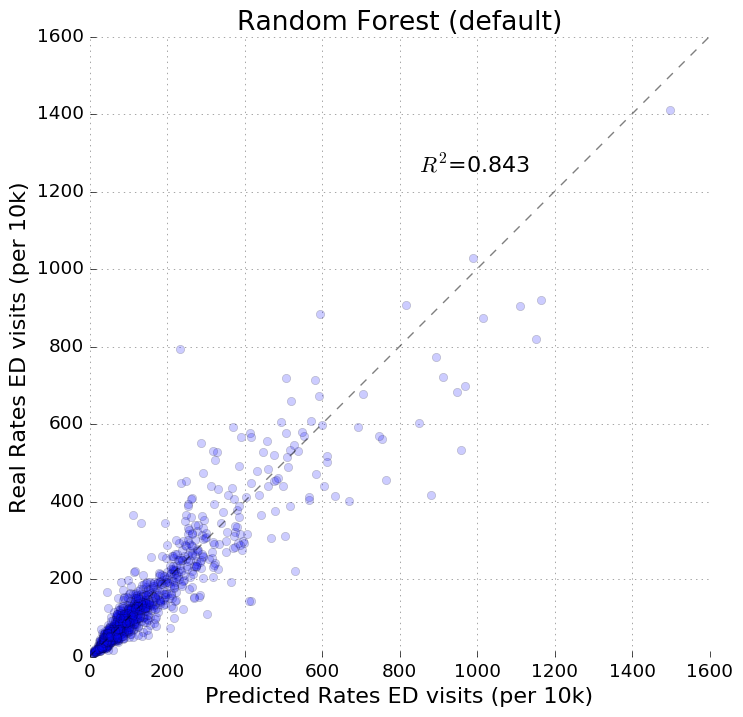

In [26]:
plt.figure(figsize=(8,8))
ax= plt.subplot(111)

plt.plot(y_predict, y_test,'bo',alpha=0.2)

xmin,xmax= plt.xlim()
z= np.linspace(xmin, xmax,10)
plt.plot(z, z,'k--',alpha=0.5)

plt.xlabel('Predicted Rates ED visits (per 10k)')
plt.ylabel('Real Rates ED visits (per 10k)')
plt.title('Random Forest (default)')

line= r'$R^2$=%.3f' % R2_test
plt.text(850,1250,line)
ax.axes.set_frame_on(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.savefig('RandomForest_Default.png')

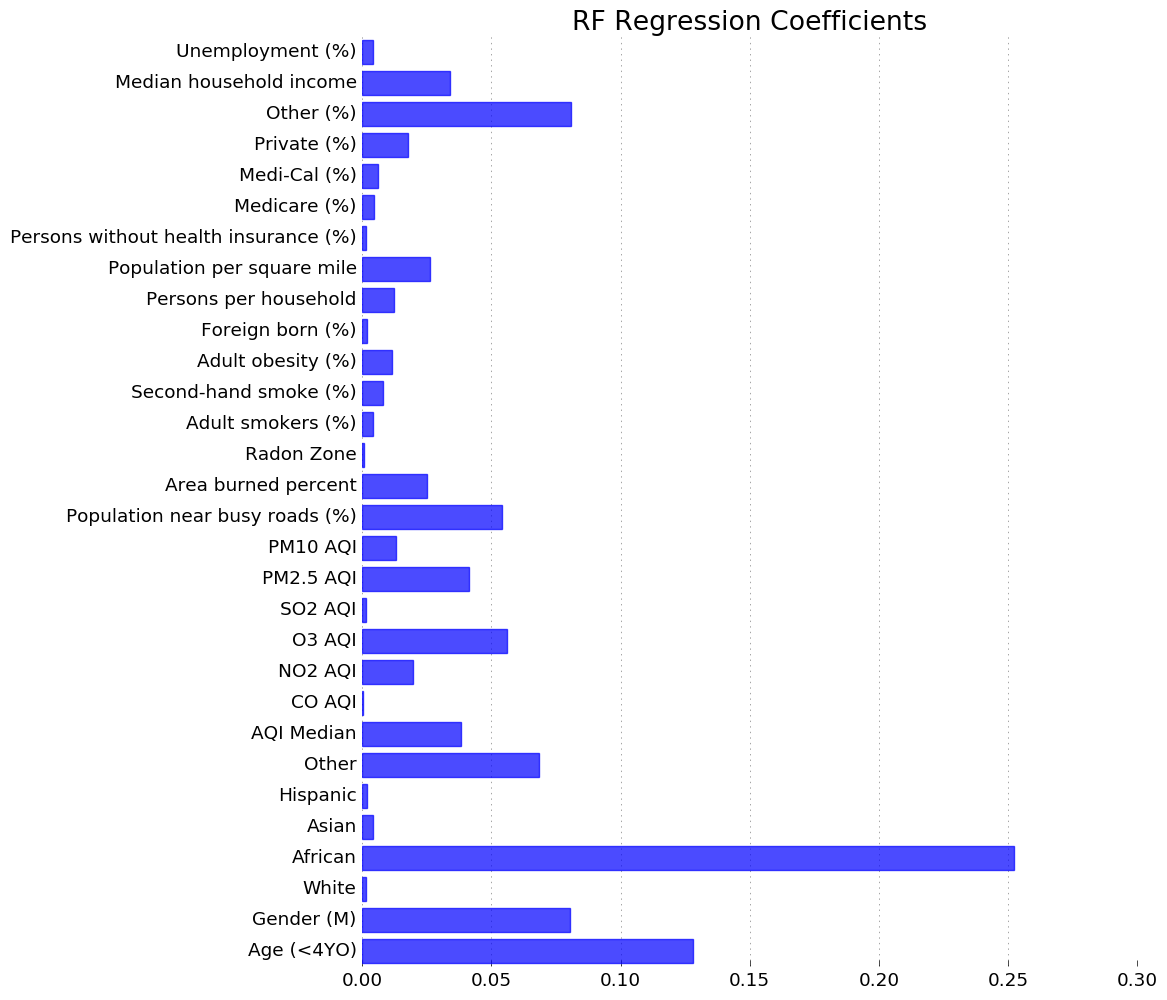

In [27]:
plt.figure(figsize=(10,12))
ax= plt.subplot(111)

Nlim= len(model.feature_importances_)
indsPLT= np.arange(Nlim)
width= 0.8
shift= 0.5*(1.-width)

plt.barh(indsPLT+shift, model.feature_importances_, height=width, color='b',ec='b',alpha=.7)

# plt.legend(loc='best')
# plt.xlim(xmin=-0.01)
plt.ylim(0,Nlim)
plt.grid(axis='y')
plt.yticks(indsPLT+0.5,scale_feats_df.columns)
plt.title('RF Regression Coefficients')

ax.yaxis.set_ticks_position('none')
ax.set_frame_on(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('none')
# xmin,xmax= plt.xlim()
# ax.hlines(indsPLT,xmin,xmax,colors='0.75',linestyles=':')

plt.savefig('RandomForest_Default_coeff.png')

Check the model on a cross-validation

In [20]:
model_cv= RandomForestRegressor(random_state=2)

In [21]:
cv= cross_val_score(model_cv,X_train,y_train,cv=10)

In [22]:
cv.mean(),cv.std()

(0.81161609662452894, 0.043121349961876644)

In [23]:
model_cv.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=2,
           verbose=0, warm_start=False)

In [24]:
model_cv.score(X_test,y_test)

0.84296344250383737

### Tune hyperparameters

In [20]:
Nfeats= len(X_train.columns)
print Nfeats

30


In [21]:
param_dist = {"n_estimators": range(5,25),
              "max_features": range(Nfeats,Nfeats-10,-1),
              "max_depth": [None, 1, 2],
              'min_samples_split': [2, 3],
              "min_samples_leaf": [1, 2, 3]
              }

Randomized Search for best parameters

In [35]:
rnd= RandomizedSearchCV(RandomForestRegressor(),param_distributions=param_dist, cv=10, n_iter=200)

In [36]:
rnd.fit(X_train,y_train)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=200, n_jobs=1,
          param_distributions={'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'max_features': [30, 29, 28, 27, 26, 25, 24, 23, 22, 21], 'min_samples_split': [2, 3], 'max_depth': [None, 1, 2], 'min_samples_leaf': [1, 2, 3]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=0)

In [38]:
rnd.best_params_

{'max_depth': None,
 'max_features': 24,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 19}

In [22]:
# model_rnd= rnd.best_estimator_
fin= open('model_RF.pkl','rb')
model_rnd= pickle.load(fin)
fin.close()

In [23]:
R2_train= model_rnd.score(X_train,y_train)
print 'R^2 on training= %f' % R2_train
R2_test= model_rnd.score(X_test,y_test)
print 'R^2 on test set= %f' % R2_test

y_predict= model_rnd.predict(X_train)
RMSE_train= np.sqrt(mean_squared_error(y_train,y_predict))
print 'RMSE on training= %f' % RMSE_train
y_predict= model_rnd.predict(X_test)
RMSE_test= np.sqrt(mean_squared_error(y_test,y_predict))
print 'RMSE on test set= %f' % RMSE_test

R^2 on training= 0.975694
R^2 on test set= 0.875110
RMSE on training= 23.374170
RMSE on test set= 51.182422


In [24]:
# pickle.dump(model_rnd,open('model_RF.pkl','wb'),2)

Grid Search for best parameters

In [43]:
grid= GridSearchCV(RandomForestRegressor(),param_grid=param_dist,cv=10)

In [44]:
grid.fit(X_train,y_train)

KeyboardInterrupt: 

In [ ]:
grid.best_params_

In [144]:
model_grid= grid.best_estimator_

In [ ]:
R2_train= model_grid.score(X_train,y_train)
print 'R^2 on training= %f' % R2_train
R2_test= model_grid.score(X_test,y_test)
print 'R^2 on test set= %f' % R2_test

y_predict= model_grid.predict(X_train)
RMSE_train= np.sqrt(mean_squared_error(y_train,y_predict))
print 'RMSE on training= %f' % RMSE_train
y_predict= model_grid.predict(X_test)
RMSE_test= np.sqrt(mean_squared_error(y_test,y_predict))
print 'RMSE on test set= %f' % RMSE_test

# Plot Regression Figures

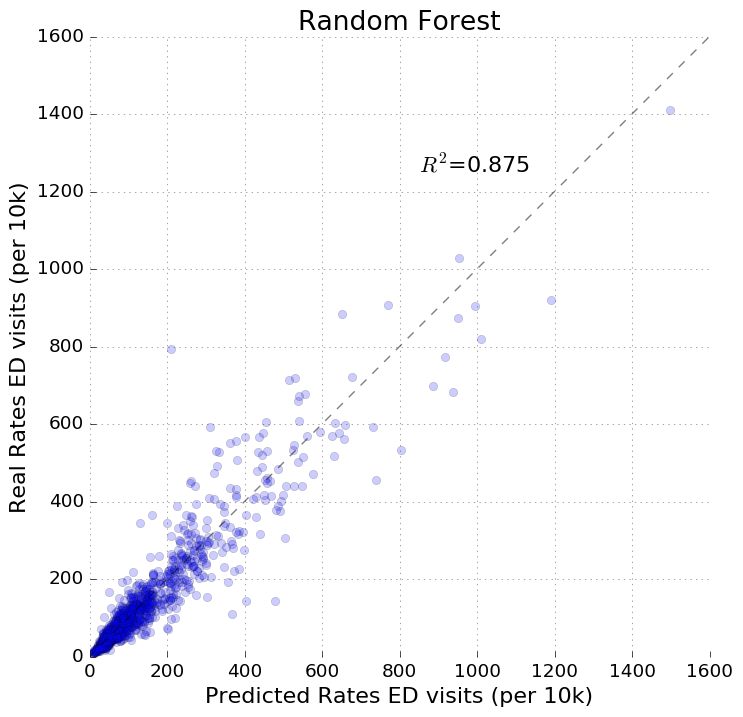

In [25]:
plt.figure(figsize=(8,8))
ax= plt.subplot(111)

plt.plot(y_predict, y_test,'bo',alpha=0.2)

xmin,xmax= plt.xlim()
z= np.linspace(xmin, xmax,10)
plt.plot(z, z,'k--',alpha=0.5)

plt.xlabel('Predicted Rates ED visits (per 10k)')
plt.ylabel('Real Rates ED visits (per 10k)')
plt.title('Random Forest')

line= r'$R^2$=%.3f' % R2_test
plt.text(850,1250,line)
ax.axes.set_frame_on(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.savefig('RandomForest_CV.png')

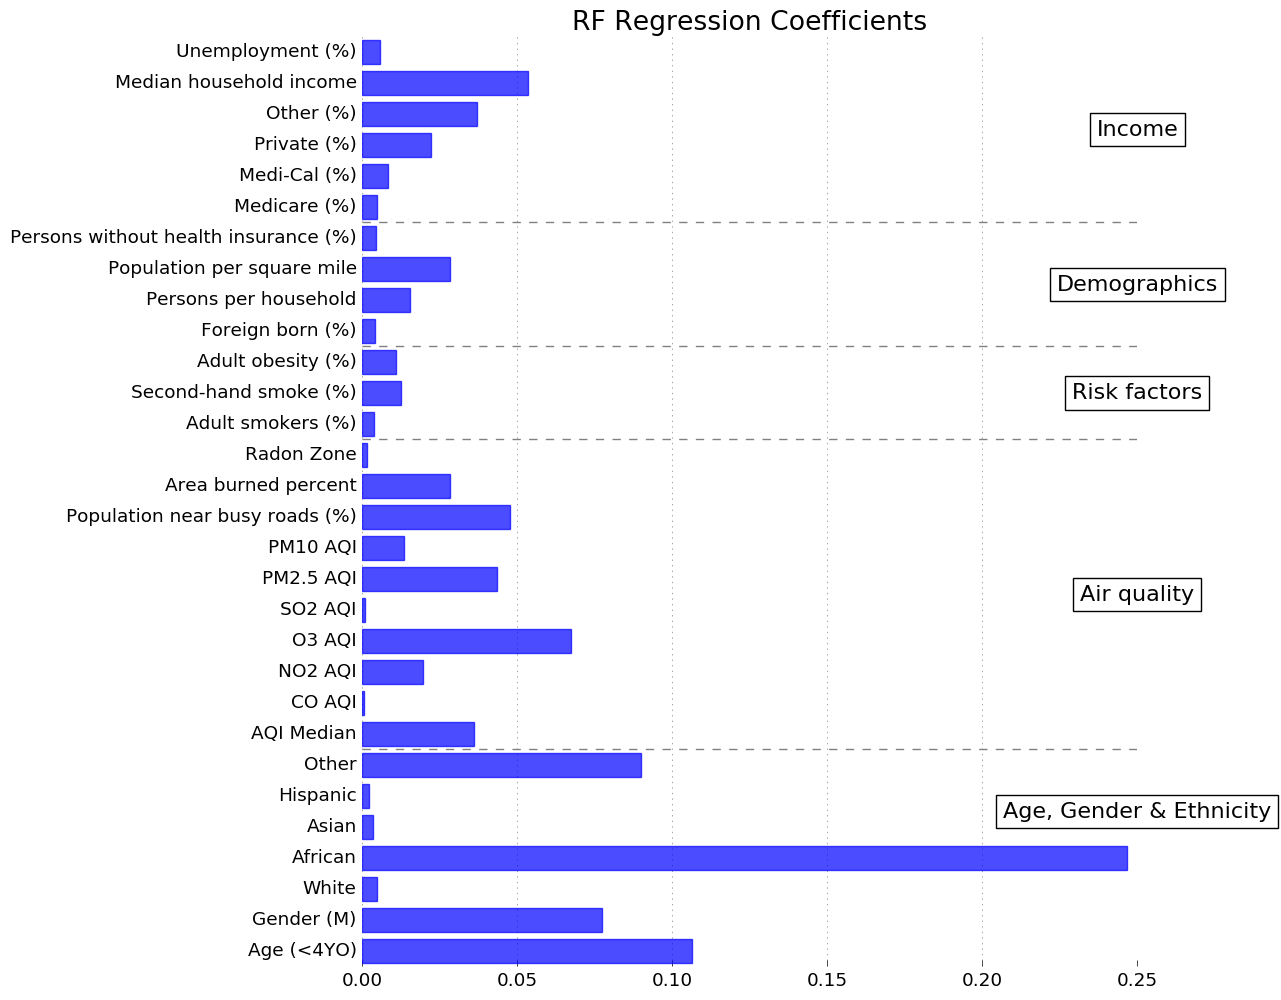

In [28]:
plt.figure(figsize=(10,12))
ax= plt.subplot(111)

Nlim= len(model_rnd.feature_importances_)
indsPLT= np.arange(Nlim)
width= 0.8
shift= 0.5*(1.-width)

plt.barh(indsPLT+shift, model_rnd.feature_importances_, height=width, color='b',ec='b',alpha=.7)

# plt.legend(loc='best')
# plt.xlim(xmin=-0.01)
plt.ylim(0,Nlim)
plt.grid(axis='y')
plt.yticks(indsPLT+0.5,scale_feats_df.columns)
plt.title('RF Regression Coefficients')

ax.yaxis.set_ticks_position('none')
ax.set_frame_on(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('none')

x_text=.25
xmin,xmax= plt.xlim()
ax.hlines([7,17,20,24],xmin,xmax,colors='0.5',linestyles='--')
plt.text(x_text,5,'Age, Gender & Ethnicity',va='center',ha='center',bbox=dict(facecolor='white',pad=5))
plt.text(x_text,12,'Air quality',va='center',ha='center',bbox=dict(facecolor='white',pad=5))
plt.text(x_text,18.5,'Risk factors',va='center',ha='center',bbox=dict(facecolor='white',pad=5))
plt.text(x_text,22,'Demographics',va='center',ha='center',bbox=dict(facecolor='white',pad=5))
plt.text(x_text,27,'Income',va='center',ha='center',bbox=dict(facecolor='white',pad=5))
plt.xlim(xmin,xmax)

plt.savefig('RandomForest_CV_coeff.png')

In [29]:
new_feats_df.columns[7:24]

Index([u'AQI Median', u'CO AQI', u'NO2 AQI', u'O3 AQI', u'SO2 AQI',
       u'PM2.5 AQI', u'PM10 AQI', u'Population near busy roads (%)',
       u'Area burned percent', u'Radon Zone', u'Adult smokers (%)',
       u'Second-hand smoke (%)', u'Adult obesity (%)', u'Foreign born (%)',
       u'Persons per household', u'Population per square mile',
       u'Persons without health insurance (%)'],
      dtype='object')

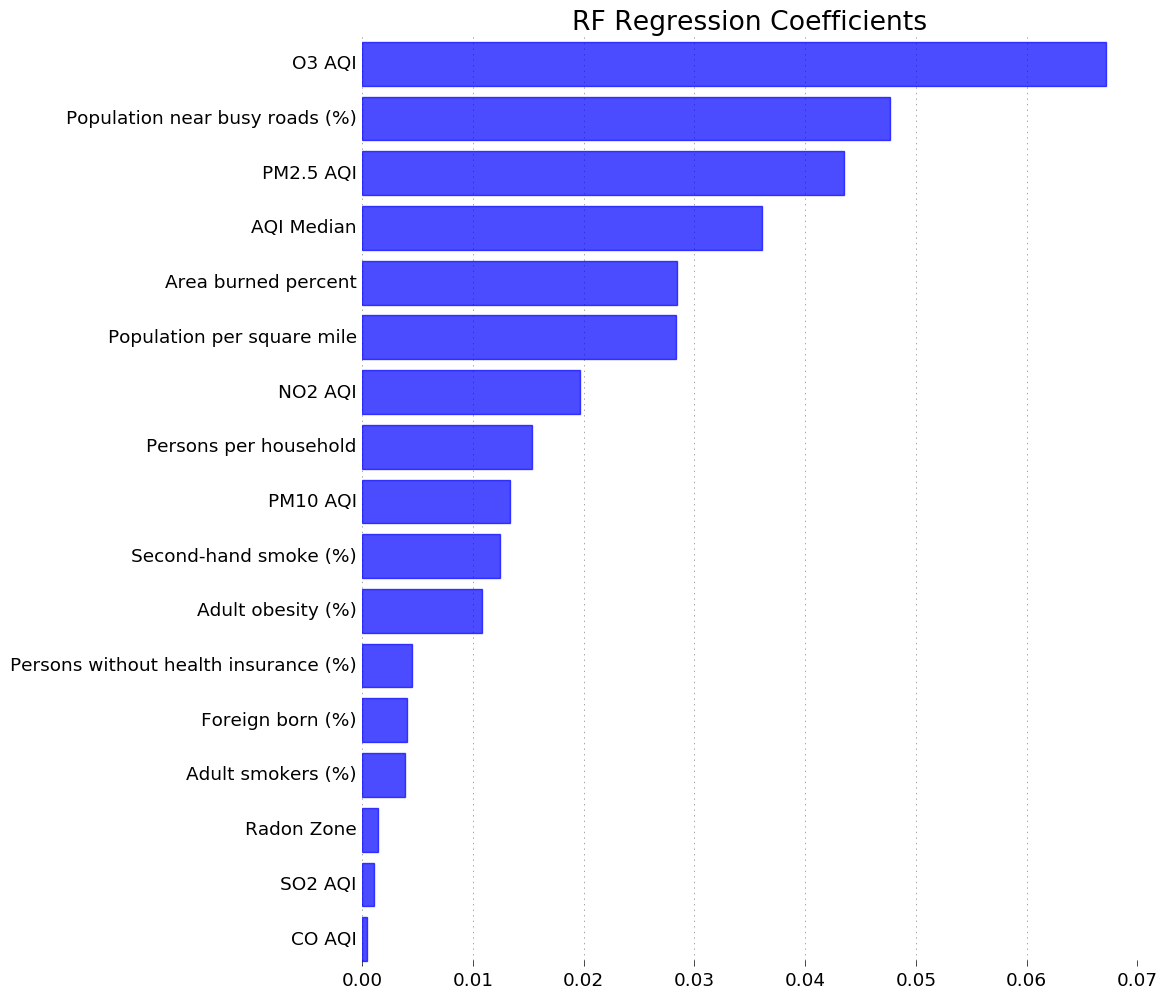

In [31]:
plt.figure(figsize=(10,12))
ax= plt.subplot(111)

feats_impo= model_rnd.feature_importances_[7:24]
feats_name= scale_feats_df.columns[7:24]

Nlim= len(feats_impo)
indsPLT= np.arange(Nlim)
width= 0.8
shift= 0.5*(1.-width)

indsSort= np.argsort(feats_impo)
plt.barh(indsPLT+shift, feats_impo[indsSort], height=width, color='b',ec='b',alpha=.7)

# plt.legend(loc='best')
# plt.xlim(xmin=-0.01)
plt.ylim(0,Nlim)
plt.grid(axis='y')
plt.yticks(indsPLT+0.5,feats_name[indsSort])
plt.title('RF Regression Coefficients')

ax.yaxis.set_ticks_position('none')
ax.set_frame_on(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('none')

# xmin,xmax= plt.xlim()
# ax.hlines([13,16],xmin,xmax,colors='0.5',linestyles='--')
# plt.xlim(xmin,xmax)

plt.savefig('RandomForest_CV_coeff_sorted.png')

# Save the data for the website

In [37]:
feats_df.columns

Index([u'Age (<4YO)', u'Gender (M)', u'White', u'African', u'Asian',
       u'Hispanic', u'Other', u'AQI Median', u'CO AQI', u'NO2 AQI', u'O3 AQI',
       u'SO2 AQI', u'PM2.5 AQI', u'PM10 AQI',
       u'Population near busy roads (%)', u'Area burned percent',
       u'Radon Zone', u'Adult smokers (%)', u'Second-hand smoke (%)',
       u'Adult obesity (%)', u'Foreign born (%)', u'Persons per household',
       u'Population per square mile', u'Persons without health insurance (%)',
       u'Medicare (%)', u'Medi-Cal (%)', u'Private (%)', u'Other (%)',
       u'Median household income', u'Unemployment (%)'],
      dtype='object')

In [38]:
# feats_df.to_csv('temp_web_feats_df',index=False,header=True)

# Get Impact Factors
### How much are ED visits affected by changes in the features?

In [33]:
cols_interest= np.arange(7,24)

feats_df.columns[cols_interest]

Index([u'AQI Median', u'CO AQI', u'NO2 AQI', u'O3 AQI', u'SO2 AQI',
       u'PM2.5 AQI', u'PM10 AQI', u'Population near busy roads (%)',
       u'Area burned percent', u'Radon Zone', u'Adult smokers (%)',
       u'Second-hand smoke (%)', u'Adult obesity (%)', u'Foreign born (%)',
       u'Persons per household', u'Population per square mile',
       u'Persons without health insurance (%)'],
      dtype='object')

In [34]:
impact_df= feats_df.iloc[:,cols_interest]

In [35]:
y_predict= model_rnd.predict(scale_feats_df)
Nrows= len(feats_df)

In [36]:
impact_df.head()

,AQI Median,CO AQI,NO2 AQI,O3 AQI,SO2 AQI,PM2.5 AQI,PM10 AQI,Population near busy roads (%),Area burned percent,Radon Zone,Adult smokers (%),Second-hand smoke (%),Adult obesity (%),Foreign born (%),Persons per household,Population per square mile,Persons without health insurance (%)
0,43.0,0.0,0.046575,0.471233,0.0,0.482192,0.0,71.7,1.474715,2,11.0,7.4,21.0,31.4,2.78,2043.6,9.6
1,43.0,0.0,0.046575,0.471233,0.0,0.482192,0.0,71.7,1.474715,2,11.0,7.4,21.0,31.4,2.78,2043.6,9.6
2,43.0,0.0,0.046575,0.471233,0.0,0.482192,0.0,71.7,1.474715,2,11.0,7.4,21.0,31.4,2.78,2043.6,9.6
3,43.0,0.0,0.046575,0.471233,0.0,0.482192,0.0,71.7,1.474715,2,11.0,7.4,21.0,31.4,2.78,2043.6,9.6
4,43.0,0.0,0.046575,0.471233,0.0,0.482192,0.0,71.7,1.474715,2,11.0,7.4,21.0,31.4,2.78,2043.6,9.6


In [37]:
r=0 # row
c=10 # column
print 'Column: %s' % feats_df.columns[c]
print 'Prediction of row %d: %f' % (r, y_predict[r])
row= feats_df.iloc[r]

Column: O3 AQI
Prediction of row 0: 258.477368


In [57]:
copy_row= row.copy()

In [59]:
len(np.arange(7,24))

17

In [257]:
for r in xrange(Nrows):
    row= feats_df.iloc[r]

#     impact_array=[]
    for i in xrange(7,24):
        copy_row= row.copy()
        copy_row.iat[i] = 0.9 * copy_row.iat[i]

        tmp= model_rnd.predict( scaler.transform( copy_row.values.reshape(1,-1) ) )[0]
        impact_df.iloc[r,i]= 100.*(1. - 1.*tmp/y_predict[r])

IndexError: single positional indexer is out-of-bounds

In [244]:
impact_df.iloc[0]= 100.*(1.-impact_array/y_predict)

In [232]:
row= feats_df.iloc[1]

row_predict= model_rnd.predict(scaler.transform(row.values.reshape(1,-1)))[0]
print row_predict
print model_rnd.predict(scale_feats_df.iloc[1].values.reshape(1,-1))[0]

619.469302083
619.469302083


In [234]:
row.copy?

In [236]:
impact_array=[]
for i in xrange(7,Nfeats):
    copy_row= row.copy()
    copy_row.iat[i] = 0.9 * copy_row.iat[i]
    print copy_row.index[i], row.iat[i], copy_row.iat[i]
    impact_array.append( model_rnd.predict( scaler.transform(copy_row.values.reshape(1,-1)) )[0] )

Good AQI 0.679452054795 0.611506849315
Moderate AQI 0.282191780822 0.25397260274
Unhealthy AQI 0.0383561643836 0.0345205479452
AQI Median 43.0 38.7
CO AQI 0.0 0.0
NO2 AQI 0.0465753424658 0.0419178082192
O3 AQI 0.471232876712 0.424109589041
SO2 AQI 0.0 0.0
PM2.5 AQI 0.482191780822 0.43397260274
PM10 AQI 0.0 0.0
Population near busy roads (%) 71.7 64.53
Area burned percent 1.47471482504 1.32724334254
Radon Zone 2.0 1.8
Adult smokers (%) 11.0 9.9
Second-hand smoke (%) 7.4 6.66
Adult obesity (%) 21.0 18.9
Foreign born (%) 31.4 28.26
Persons per household 2.78 2.502
Bachelor or higher (%) 43.0 38.7
Persons without health insurance (%) 9.6 8.64
Median household income 75619.0 68057.1
Persons in poverty (%) 11.5 10.35
Population per square mile 2043.6 1839.24
Unemployment (%) 10.7 9.63
Medicare (%) 14.97 13.473
Medi-Cal (%) 46.92 42.228
Private (%) 23.22 20.898
Other (%) 14.9 13.41


In [237]:
impact_array/row_predict

array([ 0.98495772,  1.        ,  1.        ,  1.        ,  1.        ,
        0.9614498 ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  0.9902138 ,
        1.        ,  1.        ,  1.        ,  0.96685352,  1.        ,
        1.        ,  0.99726446,  0.95479809])

In [238]:
100.*(1.-impact_array/y_predict)

array([ 1.50422775,  0.        ,  0.        ,  0.        ,  0.        ,
        3.85502019,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.97861992,
        0.        ,  0.        ,  0.        ,  3.31464838,  0.        ,
        0.        ,  0.27355404,  4.52019137])

In [239]:
row[7:], 

(Good AQI                                    0.679452
 Moderate AQI                                0.282192
 Unhealthy AQI                               0.038356
 AQI Median                                 43.000000
 CO AQI                                      0.000000
 NO2 AQI                                     0.046575
 O3 AQI                                      0.471233
 SO2 AQI                                     0.000000
 PM2.5 AQI                                   0.482192
 PM10 AQI                                    0.000000
 Population near busy roads (%)             71.700000
 Area burned percent                         1.474715
 Radon Zone                                  2.000000
 Adult smokers (%)                          11.000000
 Second-hand smoke (%)                       7.400000
 Adult obesity (%)                          21.000000
 Foreign born (%)                           31.400000
 Persons per household                       2.780000
 Bachelor or higher (%)     

In [127]:
feats_df

,Age (<4YO),Gender (M),White,African,Asian,Hispanic,Other,Good AQI,Moderate AQI,Unhealthy AQI,...,Bachelor or higher (%),Persons without health insurance (%),Median household income,Persons in poverty (%),Population per square mile,Unemployment (%),Medicare (%),Medi-Cal (%),Private (%),Other (%)
0,1,0,0,1,0,0,0,0.679452,0.282192,0.038356,...,43.0,9.6,75619,11.5,2043.6,10.7,14.97,46.92,23.22,14.90
1,1,1,0,1,0,0,0,0.679452,0.282192,0.038356,...,43.0,9.6,75619,11.5,2043.6,10.7,14.97,46.92,23.22,14.90
2,0,0,0,1,0,0,0,0.679452,0.282192,0.038356,...,43.0,9.6,75619,11.5,2043.6,10.7,14.97,46.92,23.22,14.90
3,0,1,0,1,0,0,0,0.679452,0.282192,0.038356,...,43.0,9.6,75619,11.5,2043.6,10.7,14.97,46.92,23.22,14.90
4,1,0,0,0,1,0,0,0.679452,0.282192,0.038356,...,43.0,9.6,75619,11.5,2043.6,10.7,14.97,46.92,23.22,14.90
5,1,1,0,0,1,0,0,0.679452,0.282192,0.038356,...,43.0,9.6,75619,11.5,2043.6,10.7,14.97,46.92,23.22,14.90
6,0,0,0,0,1,0,0,0.679452,0.282192,0.038356,...,43.0,9.6,75619,11.5,2043.6,10.7,14.97,46.92,23.22,14.90
7,0,1,0,0,1,0,0,0.679452,0.282192,0.038356,...,43.0,9.6,75619,11.5,2043.6,10.7,14.97,46.92,23.22,14.90
8,1,0,0,0,0,1,0,0.679452,0.282192,0.038356,...,43.0,9.6,75619,11.5,2043.6,10.7,14.97,46.92,23.22,14.90
9,1,1,0,0,0,1,0,0.679452,0.282192,0.038356,...,43.0,9.6,75619,11.5,2043.6,10.7,14.97,46.92,23.22,14.90


In [115]:
# scale_feats_df*scaler.scale_+scaler.center_